# Implementing Classifier Models via Supervised Learning for Image Classification



- The **MedMNIST** dataset which contains a range of health related image datasets that have been designed to match the shape of the original digits **MNIST dataset**. Specifically I will be working with the **BloodMNIST** part of the dataset. The code below will download the dataset and load the numpy data file. 


- The data file will be loaded as a dictionary that contains both the images and labels already split to into training, validation and test sets. The each sample is a **28 by 28 RGB image** and is not normalised. Hence I have implemented necessary pre-processing steps.


- I have trained **4** different Classifier Architectures on this dataset and then compared their performance.



In [4]:
import numpy as np
import urllib.request
import os
import warnings
warnings.filterwarnings("ignore")

# Download the dataset to the local folder
if not os.path.isfile('./bloodmnist.npz'):
    urllib.request.urlretrieve('https://zenodo.org/record/6496656/files/bloodmnist.npz?download=1', 'bloodmnist.npz')

# Load the compressed numpy array file
dataset = np.load('./bloodmnist.npz')

# The loaded dataset contains each array internally
for key in dataset.keys():
    print(key, dataset[key].shape, dataset[key].dtype)
#print(dataset.keys())


train_images (11959, 28, 28, 3) uint8
train_labels (11959, 1) uint8
val_images (1712, 28, 28, 3) uint8
val_labels (1712, 1) uint8
test_images (3421, 28, 28, 3) uint8
test_labels (3421, 1) uint8


In [5]:
print(dataset['train_images'].shape)

(11959, 28, 28, 3)


In [6]:
train_images = dataset['train_images']
train_labels = dataset['train_labels']

val_images = dataset['val_images']
val_labels = dataset['val_labels']

test_images = dataset['test_images']
test_labels = dataset['test_labels']

### 4 models are used 
- 1: Support Vector machines (SVM)
- 2: Logistic  Regression
- 3: Feed-Forward Neural Network (FNN)
- 4: Convolution Neural Network (CNN)
    
- The reason to choose these architectures is because, Support Vector machines and Logistic Regression are mostly 
used for binary classification so first training them for our multi-class data and see how do they perform on it.
- Later using Feed-Forward Neural Network (FNN) and Convolution Neural Network (CNN) which automatically learn
spatial hierarchies of features with the help of hidden layers which has functions like sigmoid, tanh and ReLU 
that helps them to automatically learn and extract features from the input data.
- Also for SVM and logisticReg I have used logloss metic to calculate loss over the iteraiton since Epoch values 
are not obtained.
- For FNN and CNN i have used tanh and  ReLU function respectively which to see how differnetly it work 
to give accuracy and loss.

### 1: Support Vector Machines (SVM)

In [7]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np

# Normalizing the values for RGB

x_train_norm = train_images / 255.0
x_val_norm = val_images / 255.0
x_test_norm = test_images /255.0

# Reshaping the array
x_train_rs = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_val_rs = x_val_norm.reshape(x_val_norm.shape[0], -1)
x_test_rs = x_test_norm.reshape(x_test_norm.shape[0], -1)



# Create an instance of the SVM model
svm_model = SVC(probability=True, C=1.0, kernel='rbf', degree=3)  

# Lists to store accuracy and log loss values for SVM
svm_train_accuracy_values = []
svm_test_accuracy_values = []
svm_train_log_loss_values = []
svm_test_log_loss_values = []

# Fit the SVM model and collect metrics over intervals
for i in range(1, 10,1):  
    svm_model.max_iter = i
    svm_model.fit(x_train_rs, train_labels)
    
    # Predict on the validation set
    svm_pred_y_labels = svm_model.predict(x_val_rs)
    
    # Predict on the test set
    svm_pred_test_labels = svm_model.predict(x_test_rs)

    # Calculate accuracy on the training and test sets for SVM
    svm_train_accuracy = accuracy_score(train_labels, svm_model.predict(x_train_rs))
    svm_test_accuracy = accuracy_score(test_labels, svm_pred_test_labels)  
    
    # Calculate log loss on the training and test sets for SVM
    svm_train_log_loss = log_loss(train_labels, svm_model.predict_proba(x_train_rs))
    svm_test_log_loss = log_loss(test_labels, svm_model.predict_proba(x_test_rs))

    # Append values to the lists for SVM
    svm_train_accuracy_values.append(svm_train_accuracy)
    svm_test_accuracy_values.append(svm_test_accuracy)
    svm_train_log_loss_values.append(svm_train_log_loss)
    svm_test_log_loss_values.append(svm_test_log_loss)


### 2: Logistic Regression

In [9]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import numpy as np


# Normalizing the values for RGB

x_train_norm = train_images / 255.0
x_val_norm = val_images / 255.0
x_test_norm = test_images /255.0

# Reshaping the array
x_train_rs = x_train_norm.reshape(x_train_norm.shape[0], -1)
x_val_rs = x_val_norm.reshape(x_val_norm.shape[0], -1)
x_test_rs = x_test_norm.reshape(x_test_norm.shape[0], -1)


# Create an instance of the Logistic Regression model
model = LogisticRegression(C=1.0, fit_intercept=True, solver='lbfgs')

# Lists to store accuracy and log loss values
train_accuracy_values = []
test_accuracy_values = []
train_log_loss_values = []
test_log_loss_values = []

# Fit the model and collect metrics over intervals
for i in range(100, 501, 50):  
    model.max_iter = i
    model.fit(x_train_rs,train_labels)
    
    # Predict on the validation set
    pred_y_labels = model.predict(x_val_rs)
    
    # Predict on the test set
    pred_test_labels = model.predict(x_test_rs)

    # Calculate accuracy on the training and test sets
    train_accuracy = accuracy_score(train_labels, model.predict(x_train_rs))
    test_accuracy = accuracy_score(test_labels, pred_test_labels)  
    
    # Calculate log loss on the training and test sets
    train_log_loss = log_loss(train_labels, model.predict_proba(x_train_rs))
    test_log_loss = log_loss(test_labels, model.predict_proba(x_test_rs))

    # Append values to the lists
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    train_log_loss_values.append(train_log_loss)
    test_log_loss_values.append(test_log_loss)



### 3: Feed-Forward Neural Network(FNN)

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assume you have loaded your dataset and split it into train, validation, and test sets
# (train_images, train_labels), (val_images, val_labels), (test_images, test_labels)

# Flatten the images for a feedforward neural network
x_train_flat = train_images.reshape((len(train_images), -1))
x_val_flat = val_images.reshape((len(val_images), -1))
x_test_flat = test_images.reshape((len(test_images), -1))

# Normalize the pixel values to the range [0, 1]
x_train_norm_flat = x_train_flat / 255.0
x_val_norm_flat = x_val_flat / 255.0
x_test_norm_flat = x_test_flat / 255.0

# Build the feedforward neural network model
model_ffnn = models.Sequential([
    layers.Dense(128, activation='tanh', input_shape=(28 * 28 * 3,)),
    # Dense layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='tanh'),
    # Dense layer with 64 neurons and ReLU activation
    layers.Dense(8, activation='softmax')
    # Output layer with 8 neurons and softmax activation
])

# Compile the model
model_ffnn.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history_ffnn = model_ffnn.fit(x_train_norm_flat, train_labels, epochs=10, validation_data=(x_val_norm_flat, val_labels))

# Evaluate the model on train set
train_loss_ffnn, train_acc_ffnn = model_ffnn.evaluate(x_train_norm_flat, train_labels)
print(f'Train accuracy (Feedforward): {train_acc_ffnn}')
print(f'Train Loss (Feedforward): {train_loss_ffnn}')

# Evaluate the model on val set
val_loss_ffnn, val_acc_ffnn = model_ffnn.evaluate(x_val_norm_flat, val_labels)
print(f'Validation accuracy (Feedforward): {val_acc_ffnn}')
print(f'Validation Loss (Feedforward): {val_loss_ffnn}')

# Evaluate the model on test set
test_loss_ffnn, test_acc_ffnn = model_ffnn.evaluate(x_test_norm_flat, test_labels)
print(f'Test accuracy (Feedforward): {test_acc_ffnn}')
print(f'Test Loss (Feedforward): {test_loss_ffnn}')

# Predictions on test set
predictions_ffnn = np.argmax(model_ffnn.predict(x_test_norm_flat), axis=1)

# Calculate accuracy
accuracy_ffnn = accuracy_score(test_labels, predictions_ffnn)
print(f'Test Accuracy (Feedforward): {accuracy_ffnn * 100:.2f}%')





Epoch 1/10


374/374 [==============================] - 3s 5ms/step - loss: 1.4596 - accuracy: 0.4632 - val_loss: 1.1224 - val_accuracy: 0.6425
Epoch 2/10
374/374 [==============================] - 1s 3ms/step - loss: 1.1064 - accuracy: 0.5915 - val_loss: 0.9736 - val_accuracy: 0.6489
Epoch 3/10
374/374 [==============================] - 1s 3ms/step - loss: 0.9870 - accuracy: 0.6353 - val_loss: 0.8494 - val_accuracy: 0.6974
Epoch 4/10
374/374 [==============================] - 1s 4ms/step - loss: 0.9110 - accuracy: 0.6654 - val_loss: 0.8218 - val_accuracy: 0.6799
Epoch 5/10
374/374 [==============================] - 1s 3ms/step - loss: 0.8557 - accuracy: 0.6890 - val_loss: 0.9896 - val_accuracy: 0.6063
Epoch 6/10
374/374 [==============================] - 1s 3ms/step - loss: 0.8207 - accuracy: 0.7002 - val_loss: 0.8024 - val_accuracy: 0.6939
Epoch 7/10
374/374 [==============================] - 1s 3ms/step - loss: 0.7852 - accuracy: 0.7141 - val_loss: 0.8157 - val_accuracy: 0.6822
E

# 4: Convolutional Neural Network (CNN)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


train_images = dataset['train_images']
train_labels = dataset['train_labels']

val_images = dataset['val_images']
val_labels = dataset['val_labels']

test_images = dataset['test_images']
test_labels = dataset['test_labels']


# Normalize the pixel values to the range [0, 1]
x_train_norm = train_images / 255.0
x_val_norm = val_images / 255.0
x_test_norm = test_images /255.0

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    # convolutional layer with 32 filters & input shape (28, 28, 3) as image is RGB 
    layers.MaxPooling2D((2, 2)),
    # 2D max_pooling layer for reducing input spatial dimensions
    layers.Conv2D(64, (3, 3), activation='relu'),
    # 2D convolutional layer with 64 filters 
    layers.Flatten(),
    # to get output as  1D array output
    layers.Dense(64, activation='relu'),
    # Dense layer with 64 neurons 
    layers.Dense(8, activation='softmax')
    # output layer with 8 neurons
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(x_train_norm, train_labels, epochs=10, validation_data=(x_val_norm, val_labels))


# Evaluate the model on train set
train_loss, train_acc = model.evaluate(x_train_norm, train_labels)
print(f'Train accuracy: {train_acc}')
print(f'Train Loss: {train_loss}')

# Evaluate the model on val set
val_loss, val_acc = model.evaluate(x_val_norm, val_labels)
print(f'Val accuracy: {val_acc}')
print(f'Val Loss: {val_loss}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_norm, test_labels)
print(f'Test accuracy: {test_acc}')
print(f'Test Loss: {test_loss}')

# Predictions on test set
predictions = np.argmax(model.predict(x_test_norm), axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')




Epoch 1/10
374/374 [==============================] - 7s 15ms/step - loss: 1.0727 - accuracy: 0.6198 - val_loss: 0.6883 - val_accuracy: 0.7640
Epoch 2/10
374/374 [==============================] - 6s 15ms/step - loss: 0.6551 - accuracy: 0.7721 - val_loss: 0.5351 - val_accuracy: 0.8183
Epoch 3/10
374/374 [==============================] - 5s 14ms/step - loss: 0.5129 - accuracy: 0.8227 - val_loss: 0.4682 - val_accuracy: 0.8405
Epoch 4/10
374/374 [==============================] - 5s 15ms/step - loss: 0.4525 - accuracy: 0.8375 - val_loss: 0.3686 - val_accuracy: 0.8750
Epoch 5/10
374/374 [==============================] - 5s 14ms/step - loss: 0.4123 - accuracy: 0.8536 - val_loss: 0.4406 - val_accuracy: 0.8452
Epoch 6/10
374/374 [==============================] - 5s 14ms/step - loss: 0.3735 - accuracy: 0.8690 - val_loss: 0.3788 - val_accuracy: 0.8610
Epoch 7/10
374/374 [==============================] - 5s 14ms/step - loss: 0.3396 - accuracy: 0.8800 - val_loss: 0.3357 - val_accuracy: 0.877

## Model Architectures and Evaluation Strategy

For first two models, the image data was first normalized by dividing pixel values by 255.0 to scale them into the range [0, 1]. Subsequently, the images were reshaped from their original dimensions into a 1D array (flattened) to serve as input features for the models.

Since the max_iter parameter in scikit-learn models controls the maximum number of iterations for the solver to converge (analogous to epochs in other contexts but not directly interchangeable), we used it to observe the models' performance over increasing training complexity.

For the neural network models, I focused on optimizing performance by experimenting with different network depths (number of hidden layers) and activation functions. All image data underwent normalization by scaling pixel values to the range [0, 1] prior to model input.

### SVM Architecture
- The SVM model was initialized with probability=True to enable predict_proba for log loss calculation, a regularization parameter C=1.0, and an rbf kernel with degree=3. To analyze the model's learning progression, we iteratively trained the SVM model, incrementing its max_iter from 1 to 9 in steps of 1. At each increment, we recorded both the accuracy and log loss on the training and test datasets.

### Logistic Regression Architecture
- The Logistic Regression model was configured with a regularization parameter C=1.0, fit_intercept=True, and the lbfgs solver. To observe the impact of increased iterations on performance, we trained the Logistic Regression model by varying its max_iter from 100 to 500 in steps of 50. For each max_iter value, we calculated and stored the accuracy and log loss for both the training and test sets.

- This iterative approach, leveraging the max_iter parameter, allowed us to analyze the training dynamics and evaluate the stability and performance of each model as they converged.



### Feedforward Neural Network (FFNN)
- The Feedforward Neural Network was designed to process flattened image data. Before inputting the data into the network, images were reshaped from their original dimensions into a 1D array.

- The FFNN architecture comprised two hidden layers with 128 and 64 neurons, respectively, both utilizing the tanh activation function. The output layer consisted of 8 neurons with a softmax activation, suitable for multi-class classification. The model was compiled using the sgd optimizer and sparse_categorical_crossentropy as the loss function. We trained this model for 10 epochs, monitoring its performance on both the training and validation sets.

### Convolutional Neural Network (CNN)
- The Convolutional Neural Network was built to leverage spatial hierarchies in the image data. Unlike the FFNN, it directly processed the normalized 3D image data (height, width, color channels).

- The CNN architecture featured two convolutional layers:

- The first Conv2D layer had 32 filters, a 3x3 kernel, and relu activation, with an input_shape of (28, 28, 3) to accommodate RGB images. This was followed by a MaxPooling2D layer with a 2x2 pool size to reduce spatial dimensions.
- The second Conv2D layer used 64 filters and a 3x3 kernel with relu activation.
- After the convolutional and pooling layers, the output was flattened into a 1D array before being fed into a dense layer with 64 neurons and relu activation. The final output layer had 8 neurons with a softmax activation. This CNN was compiled with the adam optimizer and sparse_categorical_crossentropy loss. We trained this model for 10 epochs, tracking its performance on the training and validation datasets.


By varying the number of hidden layers and activation functions, as well as choosing appropriate optimizers for each network type, I aimed to identify configurations that yielded improved accuracy results for image classification task.

### 1: Graph for Support Vector Machines (SVM)

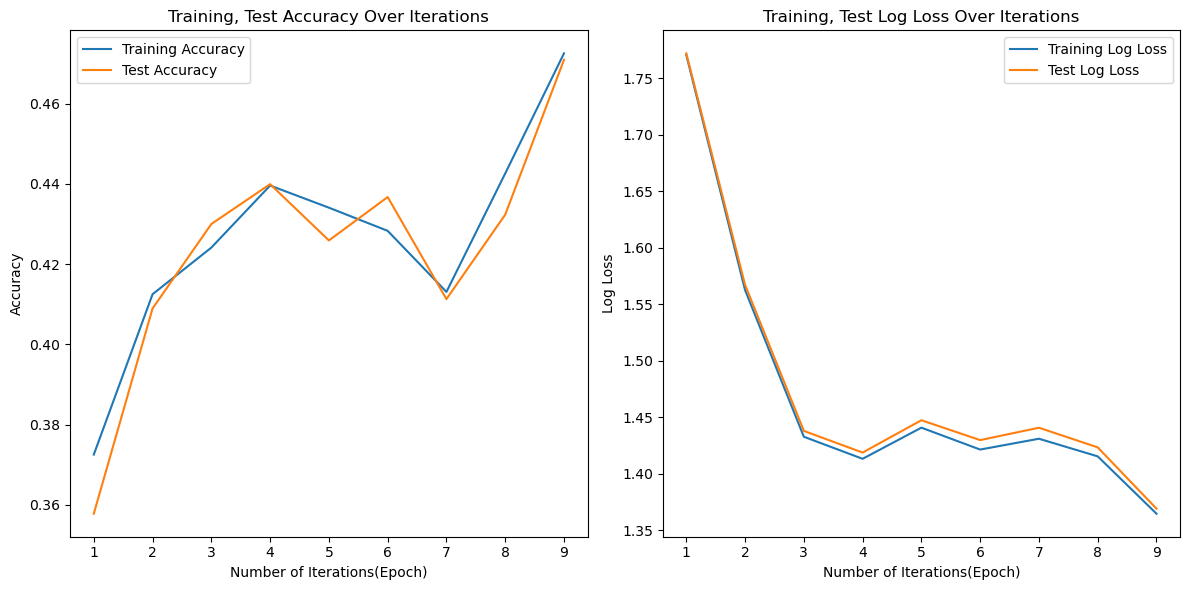

In [13]:
# Accuracy and log loss plots
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(121)
plt.plot(range(1, 10, 1), svm_train_accuracy_values, label='Training Accuracy')
plt.plot(range(1, 10, 1), svm_test_accuracy_values, label='Test Accuracy')
plt.xlabel('Number of Iterations(Epoch)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Test Accuracy Over Iterations')

# Log loss plots
plt.subplot(122)
plt.plot(range(1, 10, 1), svm_train_log_loss_values, label='Training Log Loss')
plt.plot(range(1, 10, 1), svm_test_log_loss_values, label='Test Log Loss')
plt.xlabel('Number of Iterations(Epoch)')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Training, Test Log Loss Over Iterations')

plt.tight_layout()
plt.show()



### 2: Graph for Logistic Regression

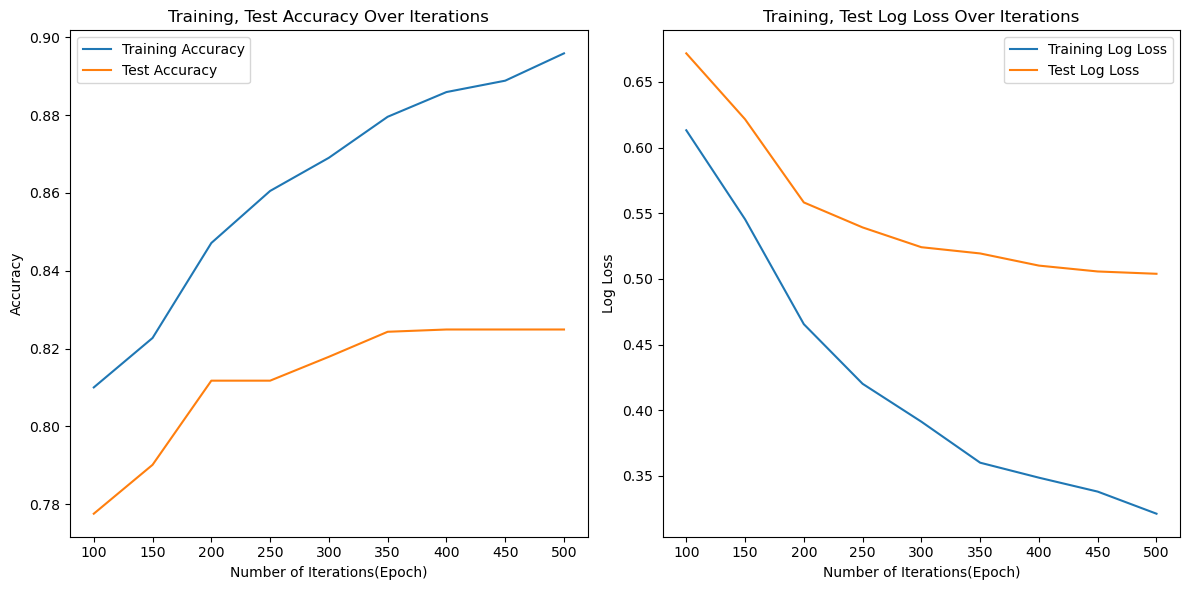

In [15]:
# Accuracy and log loss plots
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(121)
plt.plot(range(100, 501, 50), train_accuracy_values, label='Training Accuracy')
plt.plot(range(100, 501, 50), test_accuracy_values, label='Test Accuracy')
plt.xlabel('Number of Iterations(Epoch)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training, Test Accuracy Over Iterations')

# Log loss plots
plt.subplot(122)
plt.plot(range(100, 501, 50), train_log_loss_values, label='Training Log Loss')
plt.plot(range(100, 501, 50), test_log_loss_values, label='Test Log Loss')
plt.xlabel('Number of Iterations(Epoch)')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Training, Test Log Loss Over Iterations')

plt.tight_layout()
plt.show()

### 3: Graph for Feed-Forward Neural Network (FNN)

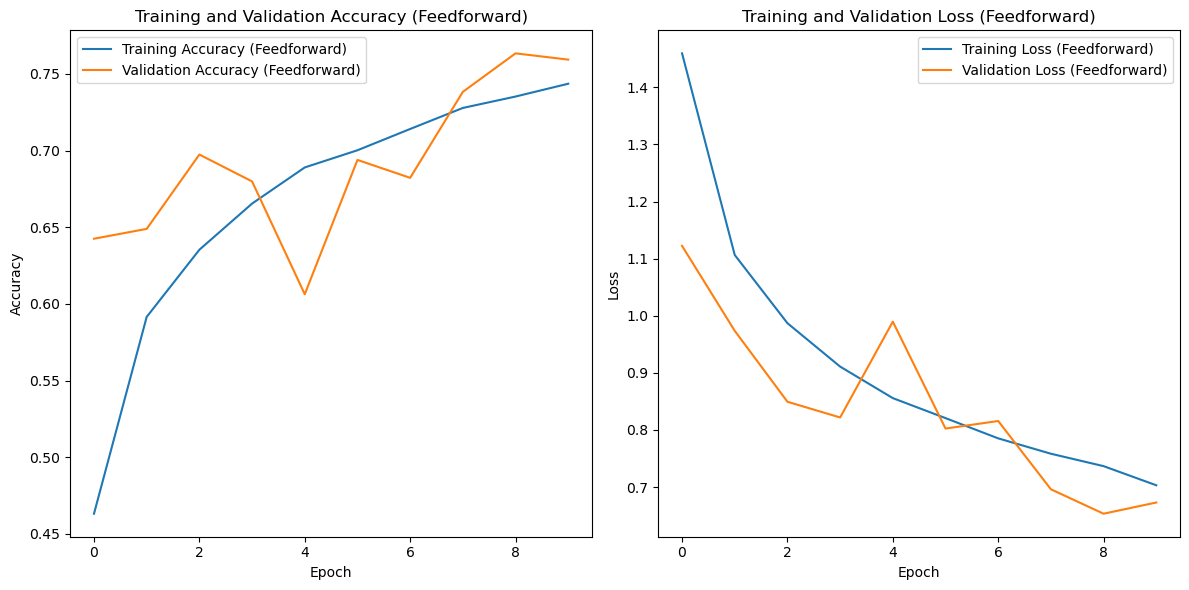

In [17]:
# Plot training history for accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_ffnn.history['accuracy'], label='Training Accuracy (Feedforward)')
plt.plot(history_ffnn.history['val_accuracy'], label='Validation Accuracy (Feedforward)')
plt.title('Training and Validation Accuracy (Feedforward)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(1, 2, 2)
plt.plot(history_ffnn.history['loss'], label='Training Loss (Feedforward)')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss (Feedforward)')
plt.title('Training and Validation Loss (Feedforward)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 4 : Graph for Convolutional Neural Network (CNN):

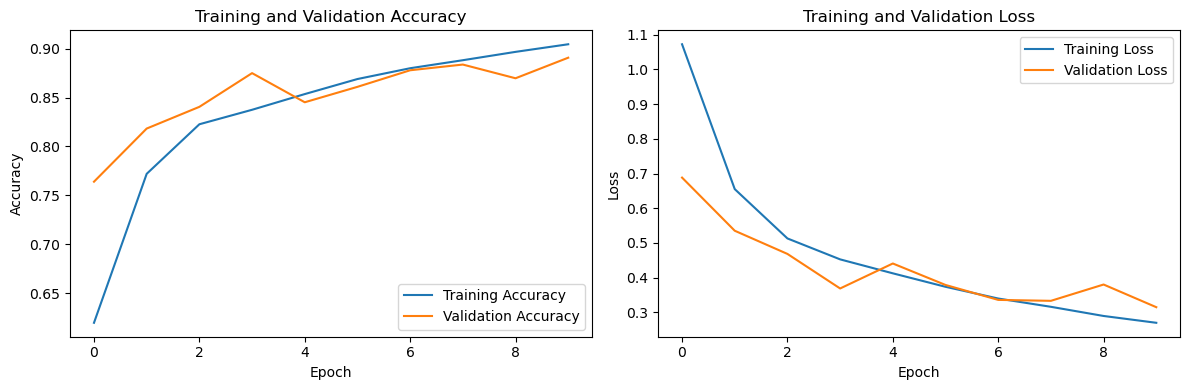

In [19]:
# Plot training history for accuracy
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()